In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install neattext
import neattext.functions as nfx
import matplotlib.pyplot as plt
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/60/Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
data['class'].value_counts()
data['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

In [ ]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=10)

**DATA VISUALISATIONS**

In [ ]:
train_data['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

**DATA CLEANING**

In [ ]:
def clean_text(text):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
#         sent=nfx.remove_shortwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

cleaned_train_text,train_text_length=clean_text(train_data.text)
cleaned_test_text,test_text_length=clean_text(test_data.text)

100%|██████████| 46415/46415 [00:02<00:00, 16826.61it/s]


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(cleaned_train_text)

In [ ]:
word_freq=pd.DataFrame(tokenizer.word_counts.items(),columns=['word','count']).sort_values(by='count',ascending=False)

In [ ]:
train_text_seq=tokenizer.texts_to_sequences(cleaned_train_text)
train_text_pad=pad_sequences(train_text_seq,maxlen=40)


test_text_seq=tokenizer.texts_to_sequences(cleaned_test_text)
test_text_pad=pad_sequences(test_text_seq,maxlen=40)

lbl_target=LabelEncoder()
train_output=lbl_target.fit_transform(train_data['class'])
test_output=lbl_target.transform(test_data['class'])

In [ ]:
with open('/content/drive/MyDrive/60/glove.840B.300d.pkl', 'rb') as fp:
    glove_embedding = pickle.load(fp)

v=len(tokenizer.word_index)

embedding_matrix=np.zeros((v+1,300), dtype=float)
for word,idx in tokenizer.word_index.items():
    embedding_vector=glove_embedding.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx]=embedding_vector

early_stop=EarlyStopping(patience=5)
reducelr=ReduceLROnPlateau(patience=3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Flatten the input sequences
train_text_flat = train_text_pad.reshape(train_text_pad.shape[0], -1)
test_text_flat = test_text_pad.reshape(test_text_pad.shape[0], -1)


In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(train_text_flat, train_output)

# Make predictions
train_predictions = logreg_model.predict(train_text_flat)
test_predictions = logreg_model.predict(test_text_flat)


In [ ]:
train_accuracy = accuracy_score(train_output, train_predictions)
test_accuracy = accuracy_score(test_output, test_predictions)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.7159846815936745
Test Accuracy: 0.7105892491651405


Train Accuracy: 0.7159846815936745
Test Accuracy: 0.7105892491651405
Train Precision: 0.7742248724646799
Test Precision: 0.7666866779457513
Train Recall: 0.6098070687593584
Test Recall: 0.6053606825820909


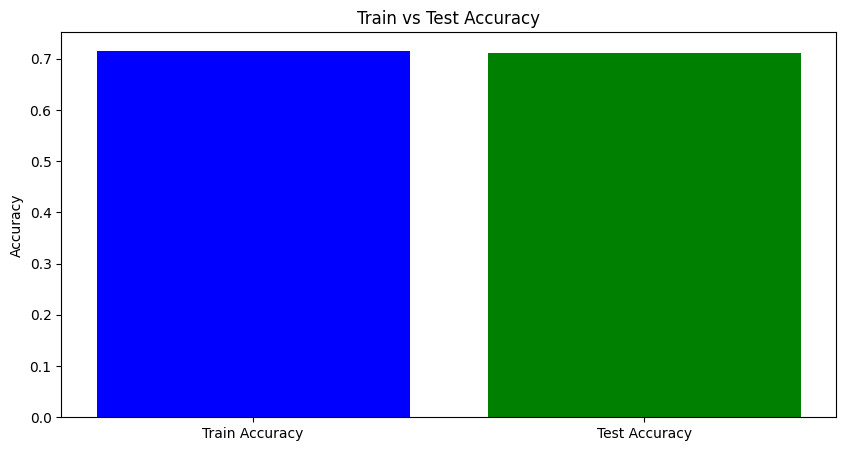

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


train_text_flat = train_text_pad.reshape(train_text_pad.shape[0], -1)
test_text_flat = test_text_pad.reshape(test_text_pad.shape[0], -1)


logreg_model = LogisticRegression()
logreg_model.fit(train_text_flat, train_output)

train_predictions = logreg_model.predict(train_text_flat)
test_predictions = logreg_model.predict(test_text_flat)


train_accuracy = accuracy_score(train_output, train_predictions)
test_accuracy = accuracy_score(test_output, test_predictions)
train_precision = precision_score(train_output, train_predictions)
test_precision = precision_score(test_output, test_predictions)
train_recall = recall_score(train_output, train_predictions)
test_recall = recall_score(test_output, test_predictions)


print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)


plt.figure(figsize=(10, 5))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.show()


